## k-means

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
%matplotlib inline

### Exemplo1: Pontos equidistantes
No exemplo a seguir vamos verificar como o algoritmo se comporta diante de uma massa de dados com pontos equidistantes

**Gerando os dados**

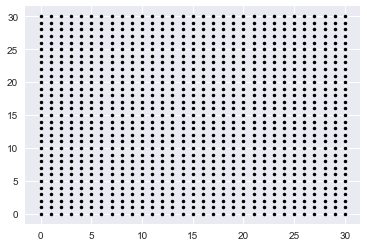

In [2]:
# Vamos gerar uma massa de dados 30x30
val = list(range(0, 31))
lista = []

# Gerando os valores da abscissa e ordenada
for i in val:
    abs = i
    for i in val:
        ord = i
        temp = [abs, ord]
        lista.append(temp)
        
# Transformando em uma array do numpy    
points = np.array(lista)

# Plotando os valores para uma melhor visualização
plt.plot(points[:, 0], points[:, 1], '.', c='black')
plt.show()

**Treinando o modelo**

In [3]:
# Treinando o modelo com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

**Executando a predição**

In [4]:
# Executando a predição(clusterizaçãoo)
y_kmeans = kmeans.predict(points)

**Plotando os valores**

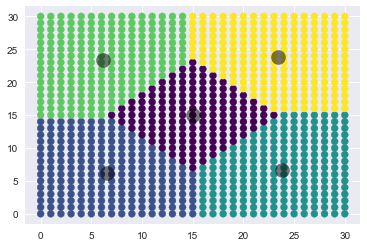

In [5]:
# Plotando os valores classificados juntamente com os centróides
plt.scatter(points[:, 0], points[:, 1], c=y_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [6]:
# Podemos verificar os valores atribuídos a cada cetro, utilizando o comando abaixo:
print(kmeans.cluster_centers_)

[[15.         15.        ]
 [ 6.58823529  6.17647059]
 [23.82352941  6.58823529]
 [ 6.17647059 23.41176471]
 [23.41176471 23.82352941]]


Perceba que por se tratar de uma massa de dados com pontos equidistantes e homogeneos, a divisão dos dados e o posicionamento das centróides foram quase que simétricas. Como já dito anteriormente o algoritmo buscou posicionar as centróides e dividir os dados de modo a minimizar as diferenças dentro de cada cluster e maximizar a diferença entre os clusters.  

k-Means também assume que todos os clusters têm o mesmo “diâmetro” em algum sentido; Ele sempre desenha o limite entre clusters para estar exatamente no meio entre os centros do cluster.

Vale a pena simular o exemplo acima com outros valores de n_clusters para verificar como o algoritmo se comporta.

### Exemplo 2: Dados não-lineares
Conforme dito na introdução ao k-menas, o algoritmo computa distâncias entre os pontos para calcular bordas de cluster de maniera linear, sendo ineficiente para dados mais complexos (como no modelo abaixo).

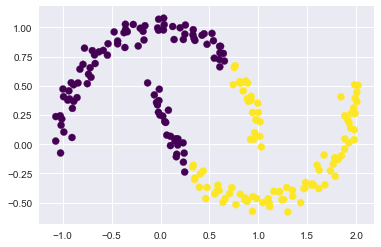

In [7]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
s=50, cmap='viridis');

Uma maneira de resolver esse problema é utilizando o kernel de transformação dos dados, implementado no estimador ``SpectralClustering``.

C:\Users\Rildo\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


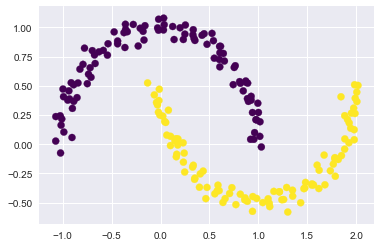

In [8]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,
s=50, cmap='viridis');

Vemos que com essa abordagem de transformação de kernel, o k-means kernelizado é capaz de encontrar os limites não-lineares mais complicados entre os clusters.

### Exemplo 3: Clusters bem definidos
Vamos, a seguir, construir um exemplo completo com 4 cluster bem definidos usando o make_blobs do scikit-learn

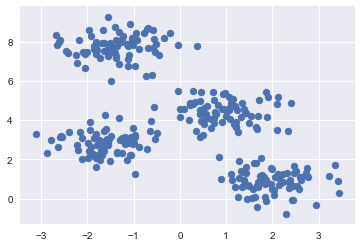

In [9]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

**Treinando e fezendo predição**

In [10]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

**Plotando o resultado**

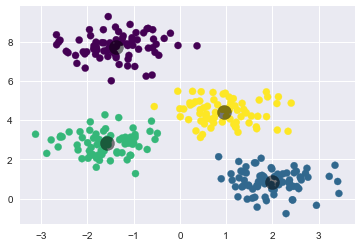

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

**Verificando as coordenadas das centróides**

In [12]:
print(kmeans.cluster_centers_)

[[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]


**Verificando os velores atribuidos pela predição**

In [13]:
print(kmeans.labels_)

[1 0 3 0 1 1 2 3 0 0 2 0 3 0 1 3 3 1 2 2 1 1 3 2 2 3 1 3 2 3 0 0 3 0 0 0 0
 0 2 1 3 2 3 3 2 2 0 2 0 1 2 1 0 1 1 2 0 2 0 1 0 3 0 2 2 2 0 1 0 2 3 2 0 2
 2 0 2 3 1 0 1 3 1 1 0 3 1 3 0 0 3 1 0 2 2 3 1 1 3 2 0 1 0 1 3 1 1 3 0 3 2
 2 1 0 1 3 0 1 1 3 2 1 2 1 1 1 1 2 1 2 0 2 2 1 0 2 2 0 3 0 0 2 3 2 3 2 0 3
 0 0 0 3 0 3 1 2 0 2 1 3 0 3 3 1 3 2 2 3 1 3 3 0 1 3 2 0 1 1 3 2 1 3 2 2 3
 3 3 3 1 0 3 2 3 3 2 2 2 3 2 0 3 2 1 2 3 0 2 0 3 0 3 2 3 3 0 2 2 1 1 3 0 1
 1 2 1 2 3 0 0 3 3 0 3 1 2 3 1 2 0 2 1 3 1 0 0 0 0 2 2 0 3 2 1 3 2 2 2 1 1
 0 3 3 2 1 0 2 3 0 3 1 1 2 2 3 1 1 1 3 0 0 1 1 3 1 1 1 0 2 0 3 1 1 0 0 0 1
 1 3 0 2]


**Método Elbow**

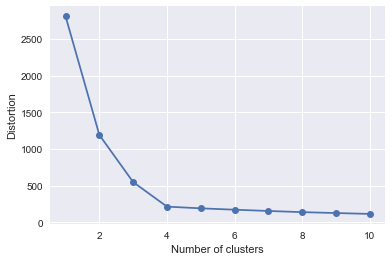

In [14]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

**Silhouette Analysis**

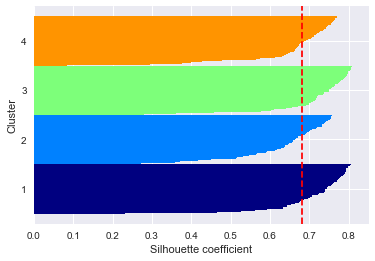

In [15]:
km = KMeans(n_clusters=4,
            random_state=0)

y_km = km.fit_predict(X)

from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()